<a href="https://colab.research.google.com/github/Cheryl0905/Datathon/blob/main/Olivia_RSM8432_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Libraries
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbalanced_pipeline

In [112]:
df = pd.read_excel('/content/SQL_Tushar.xlsx', sheet_name='Final')
y = df['Fraud']
X = df.drop(columns=['Fraud','no_attending_physicians'])

In [113]:
X['clinic_size'] = X['clinic_size'].map({'Small': 0, 'Large': 1})

In [114]:
y = y.map({'Yes': 1, 'No': 0})

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
# Scale the data
scaler = MinMaxScaler()
cols_to_exclude = ['PID', 'AttendingPhysician']
cols_to_scale = [col for col in X_train.columns if col not in cols_to_exclude]
scaled_X_train = X_train[cols_to_scale]
scaled_X_train = pd.DataFrame(scaler.fit_transform(scaled_X_train), columns=scaled_X_train.columns)
scaled_X_train

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,pct_alzheimer,pct_Heartfailure,pct_KidneyDisease,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.059740,0.045774,0.139286,0.074919,0.333333,0.133333,0.145833,0.291667,0.125,0.125000,...,0.0,0.041667,0.166667,0.0,0.0,0.250000,0.041667,0.083333,0.642857,0.0
1,0.000000,0.000704,0.085714,0.000000,0.500000,0.000000,0.000000,0.500000,0.000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
2,0.000000,0.002113,0.057143,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
3,0.005195,0.005164,0.152381,0.006515,0.166667,0.266667,0.166667,0.500000,0.000,0.166667,...,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.000000,0.142857,1.0
4,0.000000,0.001643,0.085714,0.000000,0.500000,0.000000,0.500000,0.500000,0.000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,0.000000,0.003286,0.085714,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,0.500000,...,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8331,0.000000,0.000704,0.257143,0.000000,0.000000,0.400000,0.000000,0.500000,0.500,0.500000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
8332,0.000000,0.001878,0.228571,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,0.500000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
8333,0.000000,0.000939,0.028571,0.000000,0.000000,0.400000,0.000000,0.000000,0.500,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0


In [117]:
cols_to_scale = [col for col in X_test.columns if col not in cols_to_exclude]
scaled_X_test = X_test[cols_to_scale]
scaled_X_test = pd.DataFrame(scaler.fit_transform(scaled_X_test), columns=scaled_X_test.columns)
scaled_X_test

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,pct_alzheimer,pct_Heartfailure,pct_KidneyDisease,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.000000,0.008629,0.114286,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
1,0.005155,0.005393,0.057143,0.005435,0.500000,0.000000,0.250000,0.250000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.000000,0.071429,0.0
2,0.000000,0.003236,0.085714,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.002697,0.342857,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
4,0.000000,0.004854,0.200000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0.067010,0.090497,0.171429,0.070652,0.285714,0.214286,0.178571,0.285714,0.071429,0.107143,...,0.0,0.0,0.000000,0.0,0.0,0.285714,0.357143,0.071429,0.357143,0.0
3569,0.000000,0.006472,0.571429,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
3570,0.005155,0.006472,0.071429,0.005435,0.000000,0.500000,0.500000,0.250000,0.250000,0.250000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.071429,1.0
3571,0.237113,0.232445,0.125836,0.250000,0.265957,0.234043,0.106383,0.319149,0.170213,0.234043,...,0.0,0.0,0.148936,0.0,0.0,0.276596,0.148936,0.000000,0.500000,0.0


# Model:

In [118]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [119]:
predictions = model.predict(scaled_X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [120]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6946543520850825

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2303
           1       0.60      0.41      0.49      1270

    accuracy                           0.69      3573
   macro avg       0.66      0.63      0.64      3573
weighted avg       0.68      0.69      0.68      3573



In [122]:
print(confusion_matrix(y_test, predictions))

[[1959  344]
 [ 747  523]]


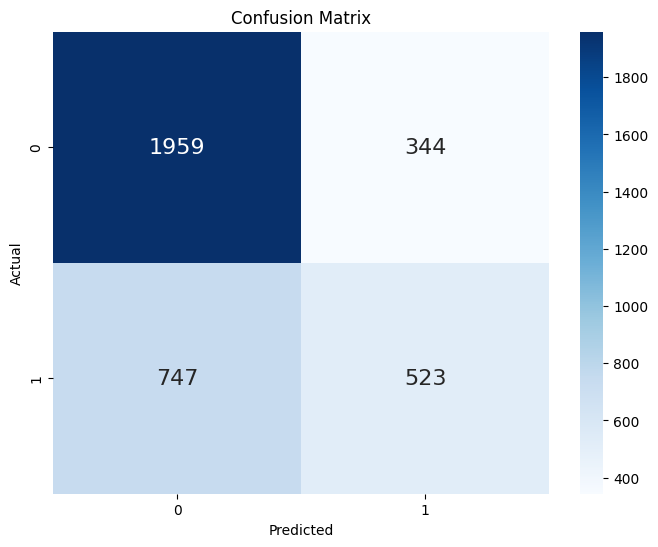

In [123]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [124]:
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': scaled_X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                     Feature  Importance
39                 types_of_patients_handled    3.785555
40                               clinic_size    1.927479
1                    total_amount_reimbursed    1.710690
3                    no_unique_beneficiaries    1.352450
0                         total_no_of_claims    1.104915
2                         avg_inpatient_time    0.723767
31                             pct_pregnancy    0.583560
21                            pct_infectious    0.528486
7                              pct_alzheimer    0.226992
4                        pct_female_patients    0.203109
5                          pct_male_patients    0.149415
33                       pct_musculoskeletal    0.139870
10                                pct_Cancer    0.138907
18                    pct_patients_not_alive    0.116340
30                         pct_genitourinary    0.115106
23                             pct_endocrine    0.110623
11         

# SMOTE:

In [125]:
over_sampling_smote = SMOTE()
model = LogisticRegression()

In [126]:
pipeline_SMOTE_Log = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', model)
    ])

In [127]:
pipeline_SMOTE_Log.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('classification', LogisticRegression())])

In [128]:
predictions = pipeline_SMOTE_Log.predict(scaled_X_test)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [129]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6697453120626924

In [130]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      2303
           1       0.52      0.83      0.64      1270

    accuracy                           0.67      3573
   macro avg       0.69      0.71      0.67      3573
weighted avg       0.74      0.67      0.68      3573



In [131]:
print(confusion_matrix(y_test, predictions))

[[1337  966]
 [ 214 1056]]


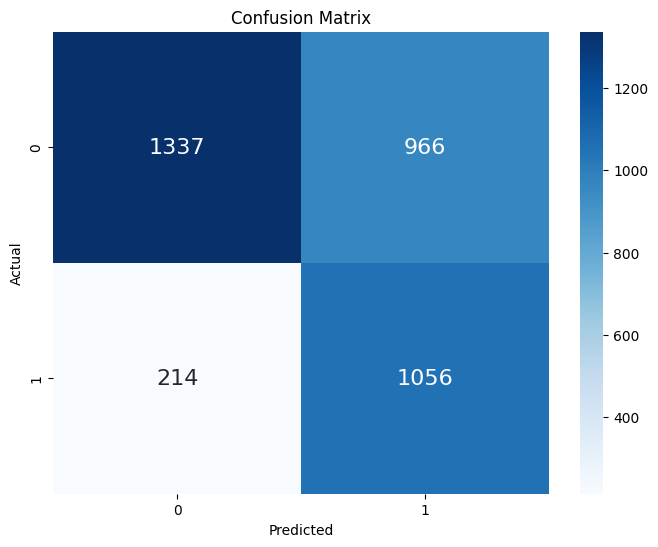

In [132]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()